In [8]:
%%html
<!-- RTL Fix the jupyter notebook 7  -->
<style>
    .jp-RenderedHTMLCommon {
        padding-top: 2em !important;
  }   
    .jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon * {
        direction: rtl !important;
        text-align:right !important;
  }
    .jp-MarkdownCell .jp-InputArea-editor {
        direction: rtl !important; 
        text-align:right !important;
        padding-top: 2em !important;
  } 

 .jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span {
        text-align:left !important;
        direction: ltr !important;
        unicode-bidi: embed !important;

    }
    .jp-RenderedHTMLCommon pre:has(code) {
      direction: ltr !important;
      text-align: left!important;
    }

</style> 

In [12]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

# רשומות ומילונים

## רשומה `tuple`: "רשימה" בלתי ניתנת לשינוי

- `tuple` היא מבנה נתונים הדומה ל־`list`, אך הוא בלתי־ניתן לשינוי (immutable).

In [ ]:
t = ("don't", "worry", "be", "happy") # definition

In [ ]:
 t[0] # indexing

In [ ]:
t[-1] # backwords indexing

In [ ]:
t[1:3] 	# slicing

In [ ]:
my_list = [1, 2, 3]
my_tuple = (1, 2, 3)
my_tuple[0:2] 

In [ ]:
my_tuple[1] = 10

<span style='color:red'> אין אפשרות לקרוא לשום מתודה שראינו בlist שמשנה את הערך המקורי כמו append, remove וכו' </span>

# מילונים: `dict`: "רשימה" עם מפתחות במקום אינדקסים

- מבנה נתונים אסוציאטיבי  
    - התאמה בין מפתח לערך (Key – Value)  
    - גישה לערכים לפי מפתח (ולא לפי מיקום כמו ברשימות)  
    - אין הבטחה לסדר של האיברים  
    - מהיר מאוד!  
  
- אינטואיציה - דפי זהב:  
    - אם יש לך שם, קל למצוא את מספר הטלפון המתאים  
    - אם יש לך מספר טלפון, קשה להתאים לו שם  

   
- המפתחות צריכים להיות:  
    - ייחודיים  
    - בלתי ניתנים לשינוי (immutable)
 
תחביר:  
```python
{key1:val1, key2:val2,…}
```


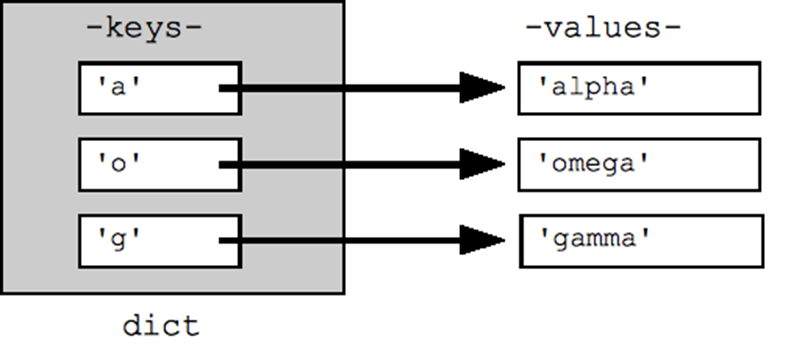

### דוגמא

In [ ]:
phonebook = {'Eric Cartman': '2021', 'Stan March': '5711', 'Kyle Broflovski': '2781'}
print(phonebook)

- הערה: באופן כללי, זוגות המפתח-ערך במילון לא בהכרח יוצגו באותו סדר שבו הוגדרו.  
  מילונים לא מבטיחים סדר מסוים של מפתחות.  
- החל מ-Python 3.7, הסדר של המילון מובטח להיות לפי סדר ההכנסה,  
  אך לא מומלץ להסתמך על כך משום שזה תלוי בגרסה/שפה.


- גישה לפי מפתח:

In [ ]:
phonebook['Eric Cartman']

- בדיקה אם מפתח קיים:

In [ ]:
'Kenny McCormick' in phonebook

- הוספה:

In [ ]:
phonebook['Kenny McCormick'] = '1234'
print(phonebook)

מה קורה כאשר מוסיפים מפתח שכבר קיים?

In [ ]:
print(phonebook)
phonebook['Kenny McCormick'] = '2222'
print(phonebook)

איך נוכל להוסיף עוד כניסה עבור Kenny McCormick בפנקס הטלפונים?

רעיון: להוסיף כתובת למפתח

In [ ]:
phonebook= {['Kenny McCormick', 'Southpark']: '2222'}

מה הבעיה?

- <span style='color:red'> מפתחות חייבים להיות בלתי ניתנים לשינוי (immutable)! </span>  
- מה אפשר לעשות?

תיקון: השתמשו ב־tuples בתור מפתחות!

In [ ]:
phonebook= {('Kenny McCormick', 'Southpark'): '2222'}
print(phonebook) 

### Dictionary methods

| פונקציה            | תיאור                                                                 |
|---------------------|------------------------------------------------------------------------|
| `D = {}`            | יוצר מילון ריק                                                         |
| `D[k] = value`      | קובע את הערך של `D[k]`                                                 |
| `k in D`            | מחזיר `True` אם `k` הוא מפתח במילון, אחרת `False`                    |
| `D[k]`              | מחזיר את הערך של המפתח `k` (יזרוק KeyError אם `k` לא קיים)           |
| `D.get(k, [d])`     | מחזיר את `D[k]` אם קיים, אחרת את `d` (ברירת מחדל: `None`)             |
| `D.keys()`          | מחזיר תצוגה של כל המפתחות במילון                                     |
| `D.values()`        | מחזיר תצוגה של כל הערכים במילון                                      |
| `D.items()`         | מחזיר תצוגה של זוגות `(מפתח, ערך)` כ־tuples                          |
| `D.pop(k, [d])`     | מסיר את המפתח `k` ומחזיר את ערכו; אם לא נמצא מחזיר `d` או שגיאה       |
| `D.copy()`          | יוצר העתק רדוד של המילון (המילון בלבד מועתק, לא האובייקטים שבתוכו)   |
| `D.update(other)`   | מוסיף את כל הפריטים מהמילון `other` לתוך `D`                         |


- ארגומנט שמסומן כ־<span style="color:red"><i>[d]</i></span> הוא אופציונלי  
    - אם לא מציינים אותו, ייעשה שימוש בערך ברירת המחדל  
- מידע נוסף על מתודות של מילון נמצא [כאן](https://docs.python.org/3/library/stdtypes.html#dict)


### תצוגות מילון (Dictionary Views)

- המתודות של מילון `keys()`, `values()`, `items()` מחזירות תצוגה איטרבילית דינמית.  
- החל מ-Python 3.7, סדר התצוגה של המילון נשמר לפי סדר ההכנסה, אבל לא כדאי להסתמך על כך.  
- ניתן לאחזר תצוגה בלולאה, לבדוק שייכות עם `in`, והיא משתנה דינמית כאשר המילון משתנה.  
- התצוגה משתנה כאשר המילון משתנה  
    - <span style='color:red'>לא לשנות את המילון תוך כדי איטרציה על אחת מהתצוגות שלו</span>


In [ ]:
d={'A':65, 'B':66, 'C':67}
print(d)
print(d.keys())
print(d.values())
print(d.items())
a=list(d.items())


In [ ]:
a=d.keys()
print(a)
d['D']=68
d['E']=69
print(a)
print('E' in a)

## דוגמה: מונה תדירות תווים

- מטרה: לספור את התדירות של כל אות במחרוזת


In [ ]:
def get_char_count(text):
    char_count = {}
    for char in text:
        if not char in char_count:
            char_count[char] = 1
        else: 
            char_count[char] += 1
    return char_count

In [ ]:
text = 'jerry'
get_char_count(text)

In [ ]:
text = 'supercalifragilisticexpialidocious'
get_char_count(text)

### מונה תדירות תווים משופר

- שימוש ב-`get()`:


In [ ]:
def get_char_count(text):
    char_count={}
    for char in text:
        char_count[char] = char_count.get(char, 0) + 1
    return char_count

text = 'jerry'
get_char_count(text)

### מונה תדירות תווים: הדפסת תוצאה ממוינת

באיזה סדר נדפיס את התווים?

**אפשרות ראשונה - לפי סדר אלפביתי**: תחילה את מספר המופעים של a, לאחר מכן את מספר המופעים של b וכו'

In [ ]:
def print_by_keys_order(d):
    sorted_chars = sorted(d)
    for char in sorted_chars:  
        print(char, ':', d[char])

text = 'supercalifragilisticexpialidocious'
cc = get_char_count(text)
print_by_keys_order(cc)

- **אפשרות שניה - לפי תדירות:** להתחיל מהאות שמופיעה הכי הרבה פעמים ולסיים בזו שמופיעה הכי מעט


In [ ]:
def print_by_keys_order(d):
    sorted_chars = sorted(d, key=d.get, reverse=True)
    for char in sorted_chars: 
        print(char, ':', d[char])

text = 'supercalifragilisticexpialidocious'
cc = get_char_count(text)
print_by_keys_order(cc)